# Predicting Road Accident Risk
Goal: Predict the likelihood of accidents on different types of road

## Dataset Overview


In [ ]:
import pandas as pd

train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/prar_data/train.csv", index_col="id")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/prar_data/test.csv", index_col="id")

### EDA

In [ ]:
def data_overview(data):
  print("****DATA OVERVIEW****")
  print("Number of observations: ", data.shape[0])
  print("Number of columns: ", data.shape[1])
  numericals = train_data.select_dtypes(exclude=["object"])
  categoricals = train_data.select_dtypes(include=["object"])
  print("Number of numerical columns: ", numericals.shape[1])
  print("Number of categorical columns: ", categoricals.shape[1])
  print("Column names: ", data.columns)
  print("Missing Values: ", data.isnull().sum())
  print("Duplicate Rows: ", data.duplicated().sum())


data_overview(train_data)

****DATA OVERVIEW****
Number of observations:  517754
Number of columns:  13
Number of numerical columns:  9
Number of categorical columns:  4
Column names:  Index(['road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting',
       'weather', 'road_signs_present', 'public_road', 'time_of_day',
       'holiday', 'school_season', 'num_reported_accidents', 'accident_risk'],
      dtype='object')
Missing Values:  road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64
Duplicate Rows:  656


In [ ]:
train_data.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
id,,,,,,,,,,,,,
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [ ]:
columns = train_data.columns.to_list()

Based on the data, it can be assumed that road design (num_lanes, speed_limit, curvature, and road_type), environmental conditions (lighting, weather, road_signs_present), and seasonal events and Timing (time_of_day, holiday, school_season) are the are the features to be used to predict the likelihood of accidents.

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517754 entries, 0 to 517753
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   road_type               517754 non-null  object 
 1   num_lanes               517754 non-null  int64  
 2   curvature               517754 non-null  float64
 3   speed_limit             517754 non-null  int64  
 4   lighting                517754 non-null  object 
 5   weather                 517754 non-null  object 
 6   road_signs_present      517754 non-null  bool   
 7   public_road             517754 non-null  bool   
 8   time_of_day             517754 non-null  object 
 9   holiday                 517754 non-null  bool   
 10  school_season           517754 non-null  bool   
 11  num_reported_accidents  517754 non-null  int64  
 12  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(2), int64(3), object(4)
memory usage: 41.5+ MB


In [ ]:
train_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
road_type,517754,3,highway,173672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_lanes,517754.0,NaN,NaN,NaN,2.491511,1.120434,1.0,1.0,2.0,3.0,4.0
curvature,517754.0,NaN,NaN,NaN,0.488719,0.272563,0.0,0.26,0.51,0.71,1.0
speed_limit,517754.0,NaN,NaN,NaN,46.112575,15.788521,25.0,35.0,45.0,60.0,70.0
lighting,517754,3,dim,183826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather,517754,3,foggy,181463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
road_signs_present,517754,2,False,259289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
public_road,517754,2,True,260045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_of_day,517754,3,morning,173410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,517754,2,True,260688,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import seaborn as sns
sns.histplot(x="accident_risk", kde=True, data=train_data)

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(train_data, title="Data Overview for Training Data", explorative=True)
profile.to_notebook_iframe()


#### Road Design

In [ ]:
import seaborn as sns

sns.boxplot(x="num_lanes", y="accident_risk", hue="road_type", data=train_data)

In [ ]:
sns.boxplot(x="speed_limit", y="accident_risk", hue="road_type", data=train_data)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.scatterplot(x="curvature", y="accident_risk", data=train_data)

In [ ]:
sns.lmplot(x='curvature', y='accident_risk', hue="road_type", data=train_data)

In [ ]:
sns.violinplot(x="curvature", data=train_data)

#### Environmental

In [ ]:
sns.boxplot(x="lighting", y="accident_risk", data=train_data)

In [ ]:
sns.boxplot(x="weather", y="accident_risk", hue="road_type", data=train_data)

In [ ]:
sns.boxplot(x="road_signs_present", y="accident_risk", hue="road_type", data=train_data)

In [ ]:
sns.boxplot(x="road_signs_present", y="accident_risk", hue="lighting", data=train_data)

In [ ]:
sns.boxplot(x="road_signs_present", y="accident_risk", hue="weather", data=train_data)

#### Time & Seasonal

In [ ]:
sns.boxplot(x="time_of_day", y="accident_risk", hue="lighting", data=train_data)

In [ ]:
sns.boxplot(x="holiday", y="accident_risk", data=train_data)

In [ ]:
sns.boxplot(x="school_season", y="accident_risk", hue="road_type", data=train_data)

In [ ]:
sns.boxplot(x="school_season", y="accident_risk", data=train_data)

In [ ]:
sns.boxplot(x="school_season", y="accident_risk", hue="lighting", data=train_data)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(font_scale=1.1)
num_features = ["num_lanes", "speed_limit", "curvature", "accident_risk"]
correlation_df = train_data[num_features].corr()
mask = np.triu(correlation_df.corr())
plt.figure(figsize=(15,15))
sns.heatmap(correlation_df,
            annot=True,
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)
plt.show()

#### Outliers

In [ ]:
def detect_outliers_iqr_summary(dataframe, features):
  outliers_summary = {}
  for feature in features:
    data = dataframe[feature]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outliers_summary[feature] = len(outliers)

  return outliers_summary

outliers_summary = detect_outliers_iqr_summary(train_data, ["num_lanes", "speed_limit", "curvature"])
print(outliers_summary)

#### Data Leakage

`num_reported accidents` could irectly cause data leakage because since it is derived from accident risk. Therefore, the action that will be taken is transform this feature and make it more useful and prevent data leakage.

Since the data is derived from a simulation of real-world condiditions and accident risk, I will not treat the data source a data leakage.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, spearmanr

def analyse_feature_effect(data, col, target_col="accident_risk"):
  print("Variable Summary:")
  print(data[col].value_counts().sort_index())
  print("\n")

  # --- 1. Barplot of average accident risk per col count
  plt.figure(figsize=(8,4))
  sns.barplot(x=col, y= target_col, data=data, palette="Blues_d")
  plt.title(f"Average Accident Risk by {col}")
  plt.ylabel("Mean Accident Risk (+/- SD)")
  plt.xlabel("Number of Lanes")
  plt.show()

  # --- 2. Boxplot of distributions
  plt.figure(figsize=(8,4))
  sns.boxplot(x=col, y=target_col, data=data, palette="Set2")
  plt.title(f"Distribution of {target_col} by {col}")
  plt.show()

# --- 3. LOWESS trend (continous view)
  plt.figure(figsize=(6,4))
  sns.regplot(x=col, y=target_col, data=data, lowess=True, scatter_kws={"alpha":0.4})
  plt.title(f"Smoothed Trend (LOWESS) between {col} and {target_col}")
  plt.xlabel(col)
  plt.ylabel(target_col)
  plt.show()

  # --- 4. Descriptive Statistics by col
  print(f"Descriptive Statistics by {col}:")
  print(data.groupby(col)[target_col].describe().round(3))
  print("\n")

  # --- 5. ANOVA test (comparing mean risk across col groups)
  groups = [data.loc[data[col] == n, target_col] for n in data[col].unique()]
  f_stat, p_val = f_oneway(*groups)
  print(f"ANOVA: F-statistic - {f_stat:.3f}, p-value={p_val:.5f}")

  # --- 6. Spearman correlation (to check monotonic trend)
  corr, _ = spearmanr(data[col], data[target_col])
  print(f"Spearman Correlation: {corr:.3f}, p-value = {_:.5f}")

  # --- 7. Interpret results
  print("\n Interpretation:")
  if p_val < 0.05:
    print(f"There is a significant relationship between {col} and {target_col}.")
  else:
    print(f"There is no significant relationship between {col} and {target_col}.")

  # if abs(corr) > 0.2:
  #   trend = "positive" if corr > 0 else "negative"
  #   print(f"The relationship between {col} and {target_col} is a {trend} monotonic.")
  # else:
  #   print(f"The relationship between {col} and {target_col} is a {trend} monotonic.")


In [ ]:
analyse_feature_effect(train_data, col="num_lanes")

In [ ]:
import seaborn as sns
sns.violinplot(x="num_lanes", y="accident_risk", data=train_data)

#### Curvature

In [ ]:
def find_spearman_corr(data, target_col="accident_risk"):
  correlations = {}
  for col in data.columns:
    if col != target_col:
      corr, _ = spearmanr(data[col], data[target_col])
    if abs(corr) > 0.2:
      correlations[col] = corr
  return correlations

In [ ]:
from scipy.stats import spearmanr

print(find_spearman_corr(train_data, target_col="curvature"))

#### Mutual information

In [ ]:
from sklearn.feature_selection import mutual_info_regression



mutual_df = train_data[ohe_categoricals]
mutual_info = mutual_info_regression(mutual_df, train_data["accident_risk"])
mutual_info = pd.Series(mutual_info, index=mutual_df.columns)
pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["MI_score"]).style.background_gradient("cool")

# Feature Engineering

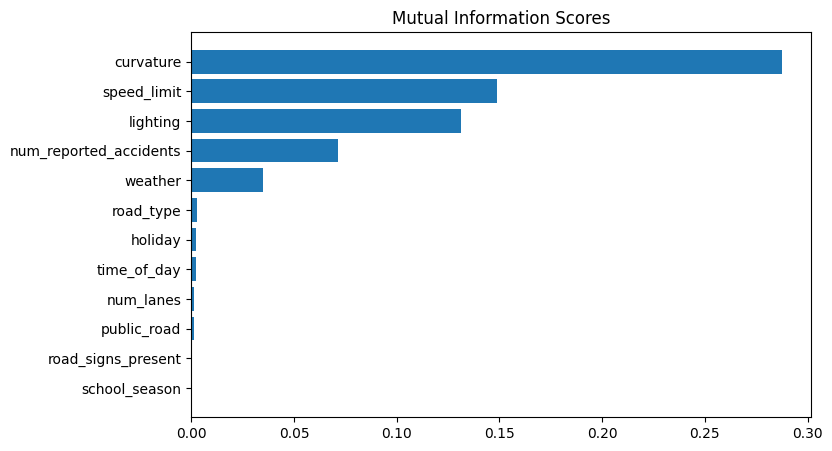

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
X = train_data.copy()
y = X.pop("accident_risk")

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show

X_train, X_valid, y_train, y_valid, = train_test_split(X, y, shuffle=True, train_size=0.8, test_size=0.2, random_state=42)
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [ ]:
features = ["curvature", "speed_limit", "lighting", "weather"]

In [ ]:
X_train.head()

In [ ]:
print("Duplicate Rows: ", X_train.duplicated().sum())

In [ ]:
print("Duplicate Rows: ", X_valid.duplicated().sum())

In [ ]:
print("Duplicate Rows: ", train_data.duplicated().sum())

In [ ]:
print(X_train.duplicated())

In [ ]:
X_train.columns

Index(['road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting',
       'weather', 'road_signs_present', 'public_road', 'time_of_day',
       'holiday', 'school_season', 'num_reported_accidents'],
      dtype='object')

In [ ]:
X_train.drop(["num_reported_accidents"], axis=1, inplace=True)

In [ ]:
X_valid.drop(["num_reported_accidents"], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression # Import LinearRegression
from sklearn import tree
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# X = train_data.copy()
# y = X.pop("accident_risk")

# X.drop( ["num_reported_accidents"],inplace=True)

X_train, X_valid, y_train, y_valid, = train_test_split(X, y, shuffle=True, train_size=0.8, test_size=0.2, random_state=42)

numerical_cols = [colname for colname in X_train.columns if X_train[colname].dtype in ["int64", "float64"]]
categorical_cols = [colname for colname in X_train.columns if X_train[colname].dtype == "object"]

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Base learner pipelines

log_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression()) # Changed to LinearRegression
])

rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=0))
])
dt_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', tree.DecisionTreeRegressor(random_state=0))
])
xgb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=0))
])

meta_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor(random_state=0))
])

stack_model = StackingRegressor(
    estimators=[
        ('log', log_pipe),
        ('rf', rf_pipe),
        ('dt', dt_pipe),
        ('xgb', xgb_pipe)],
    final_estimator=meta_pipe,
    cv=2,
    n_jobs=-1
)

stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"RMSE: {rmse:.3f}")

KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    stack_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=2, scoring='neg_root_mean_squared_error', shuffle=True, random_state=42
)

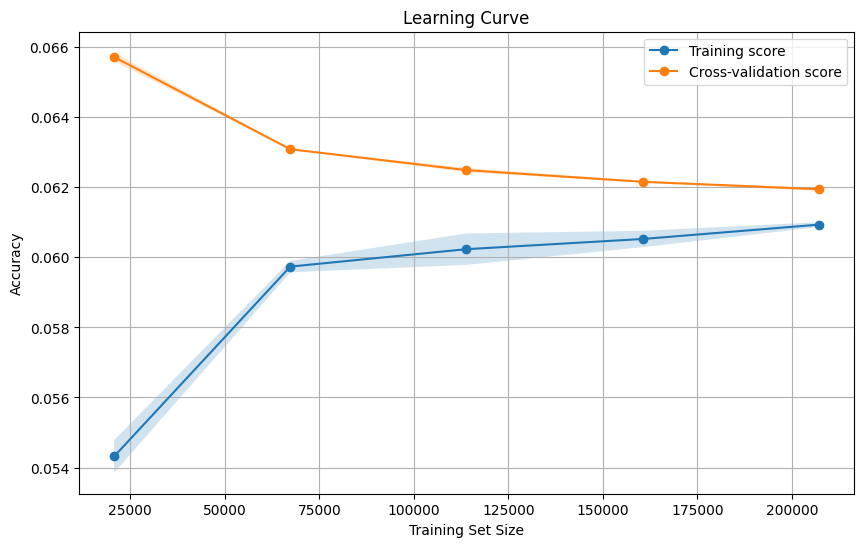

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
X_train, X_valid, y_train, y_valid, = train_test_split(X, y, shuffle=True, train_size=0.8, test_size=0.2, random_state=42)


In [ ]:
X_train["lane_density"] = X_train["speed_limit"] / X_train["num_lanes"]
X_valid["lane_density"] = X_valid["speed_limit"] / X_valid["num_lanes"]
X_train["road_complexity_index"] = X_train["curvature"] * (70 / X_train["speed_limit"])
X_valid["road_complexity_index"] = X_valid["curvature"] * (70 / X_valid["speed_limit"])
X_train["safety_score"] = (
    X_train["road_signs_present"].astype(int)
    + X_train["public_road"].astype(int)
    + (X_train["lighting"] == 'daylight').astype(int)
    - X_train["weather"].isin(['rainy','foggy']).astype(int)
)
X_valid["safety_score"] = (
    X_valid["road_signs_present"].astype(int)
    + X_valid["public_road"].astype(int)
    + (X_valid["lighting"] == 'daylight').astype(int)
    - X_valid["weather"].isin(['rainy','foggy']).astype(int)
)
X_train["speed_curvature_interaction"] = X_train["curvature"] * X_train["speed_limit"]
X_valid["speed_curvature_interaction"] = X_valid["curvature"] * X_valid["speed_limit"]



In [ ]:
X_train.drop(["public_road","road_type","holiday","num_lanes","time_of_day","school_season","road_signs_present"], axis=1, inplace=True)
X_valid.drop(["public_road","road_type","holiday","num_lanes","time_of_day","school_season","road_signs_present"], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression # Import LinearRegression
from sklearn import tree
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# X = train_data.copy()
# y = X.pop("accident_risk")

# X.drop( ["num_reported_accidents"],inplace=True)

# X_train, X_valid, y_train, y_valid, = train_test_split(X, y, shuffle=True, train_size=0.8, test_size=0.2, random_state=0)

numerical_cols = [colname for colname in X_train.columns if X_train[colname].dtype in ["int64", "float64"]]
categorical_cols = [colname for colname in X_train.columns if X_train[colname].dtype == "object"]

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Base learner pipelines

log_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression()) # Changed to LinearRegression
])

rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=0))
])
dt_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', tree.DecisionTreeRegressor(random_state=0))
])
xgb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=0))
])

meta_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor(random_state=0))
])

stack_model = StackingRegressor(
    estimators=[
        ('log', log_pipe),
        ('rf', rf_pipe),
        ('dt', dt_pipe),
        ],
    final_estimator=meta_pipe,
    cv=2,
    n_jobs=-1
)
stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"RMSE: {rmse:.3f}")

RMSE: 0.063


In [ ]:
X_train.columns

Index(['curvature', 'speed_limit', 'lighting', 'weather', 'lane_density',
       'road_complexity_index', 'safety_score', 'speed_curvature_interaction'],
      dtype='object')

In [ ]:
test_data["lane_density"] = test_data["speed_limit"] / test_data["num_lanes"]
test_data["road_complexity_index"] = test_data["curvature"] * (70 / test_data["speed_limit"])
test_data["safety_score"] = (
    test_data["road_signs_present"].astype(int)
    + test_data["public_road"].astype(int)
    + (test_data["lighting"] == 'daylight').astype(int)
    - test_data["weather"].isin(['rainy','foggy']).astype(int)
)

test_data["speed_curvature_interaction"] = test_data["curvature"] * test_data["speed_limit"]


In [ ]:
test_data.drop(["public_road","road_type","holiday","num_lanes","time_of_day","school_season","road_signs_present"], axis=1, inplace=True)


In [ ]:
test_preds = stack_model.predict(test_data)

ValueError: could not convert string to float: 'night'

In [ ]:
X.drop(["road_complexity_index"], axis=1,inplace=True)
test_data.drop(["road_complexity_index"], axis=1, inplace=True)

In [ ]:
X["lane_density"] = X["speed_limit"] / X["num_lanes"]
X["road_complexity_index"] = test_data["curvature"] * (70 / X["speed_limit"])
X["safety_score"] = (
    X["road_signs_present"].astype(int)
    + X["public_road"].astype(int)
    + (X["lighting"] == 'daylight').astype(int)
    - X["weather"].isin(['rainy','foggy']).astype(int)
)

X["speed_curvature_interaction"] = X["curvature"] * X["speed_limit"]

In [ ]:
numerical_cols = [colname for colname in X.columns if X[colname].dtype in ["int64", "float64"]]
categorical_cols = [colname for colname in X.columns if X[colname].dtype == "object"]

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Base learner pipelines

log_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression()) # Changed to LinearRegression
])

rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=0))
])
dt_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', tree.DecisionTreeRegressor(random_state=0))
])
xgb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=0))
])

meta_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor(random_state=0))
])

stack_model = StackingRegressor(
    estimators=[
        ('log', log_pipe),
        ('rf', rf_pipe),
        ('dt', dt_pipe),
        ],
    final_estimator=meta_pipe,
    cv=2,
    n_jobs=-1
)
stack_model.fit(X, y)
y_pred = stack_model.predict(test_data)



TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}
Detailed tracebacks of the workers should have been printed to stderr in the executor process if faulthandler was not disabled.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517754 entries, 0 to 517753
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   road_type                    517754 non-null  int64  
 1   num_lanes                    517754 non-null  int64  
 2   curvature                    517754 non-null  float64
 3   speed_limit                  517754 non-null  int64  
 4   lighting                     517754 non-null  int64  
 5   weather                      517754 non-null  int64  
 6   road_signs_present           517754 non-null  bool   
 7   public_road                  517754 non-null  bool   
 8   time_of_day                  517754 non-null  int64  
 9   holiday                      517754 non-null  bool   
 10  school_season                517754 non-null  bool   
 11  num_reported_accidents       517754 non-null  int64  
 12  lane_density                 517754 non-null  float64
 13  road

In [ ]:
output = pd.DataFrame({'Id': test_data.Id,
                       'accident_risk': y_pred})
output.to_csv('submission.csv', index=False)